# CONTRASTES DE HIPÓTESIS

Máster: Data Science y Business Analytics

Módulo: Estadística para Científicos de Datos

Profesora: Paloma Fontanillo Rodrigo

## Importamos las librerías necesarias

In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
np.random.seed(5)

from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import uniform

from scipy.stats import ttest_1samp

from scipy.stats import ttest_ind

from scipy.stats import shapiro
from scipy.stats import normaltest

from scipy.stats import ks_2samp

from scipy.stats import kstest

from scipy.stats import levene

from scipy.stats import f_oneway


import statsmodels.api as sm

import matplotlib.pyplot as plt

import numpy as np

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

## Análisis Normalidad: Contrastes, QQ plots y Ploteo de Densidad

Para hacer los contrastes de manera rigurosa debemos asegurarnos que la distribución se aproxima por una Normal. Para ello tenemos los siguientes contrastes.

En la muestra A caso generamos datos de una exponencial y observamos mediante el contraste shapiro que el pvalor dictamina que no es normal, a su vez vemos en un qqplot que los puntos no están sobre la línea, esto significa que los cuantiles no están distribuídos como en una normal.

En la muestra B caso generamos datos de una enormal y observamos mediante el contraste shapiro que el pvalor dictamina que efectivamente es normal, a su vez vemos en un qqplot que los puntos sí están sobre la línea, esto significa que los cuantiles están distribuídos como en una normal.


In [144]:
muestra_A = expon.rvs(scale=10, size=500)
muestra_B = norm.rvs(4,2, size=4999)

###### Muestra A

ShapiroResult(statistic=0.7978161573410034, pvalue=1.771020145137628e-24)


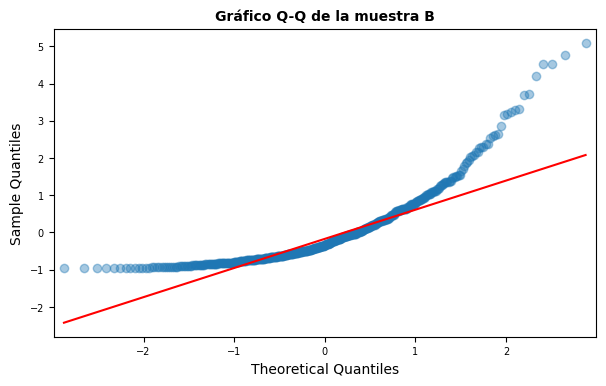

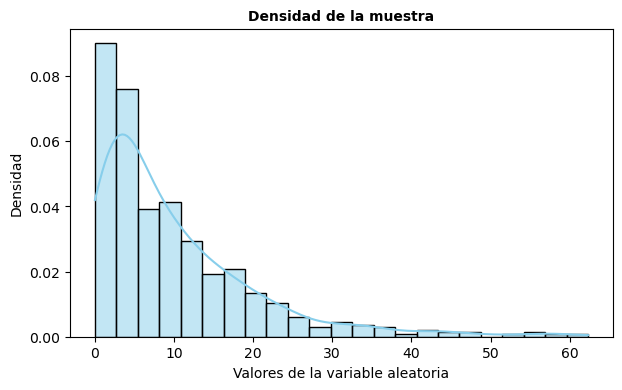

In [145]:
# Contraste de Hipótesis
# ==============================================================================
print(shapiro(muestra_A))

# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    muestra_A,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de la muestra B', fontsize = 10, fontweight = "bold")
ax.tick_params(labelsize = 7)
plt.show()


# Gráfico Histograma 
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sns.histplot(muestra_A, kde=True, stat="density", color="skyblue")


plt.xlabel('Valores de la variable aleatoria')
plt.ylabel('Densidad')
plt.title('Densidad de la muestra' , fontsize = 10, fontweight = "bold")

plt.show()

###### Muestra B

ShapiroResult(statistic=0.9995994567871094, pvalue=0.4152153432369232)


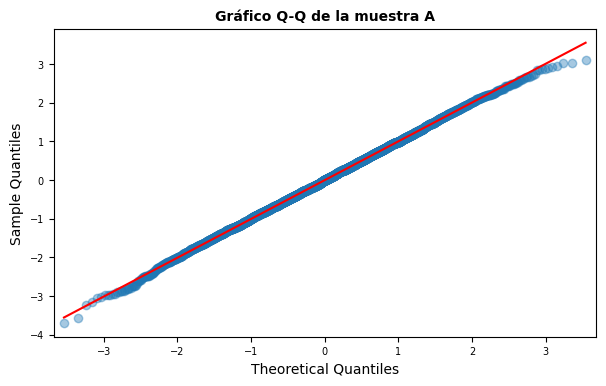

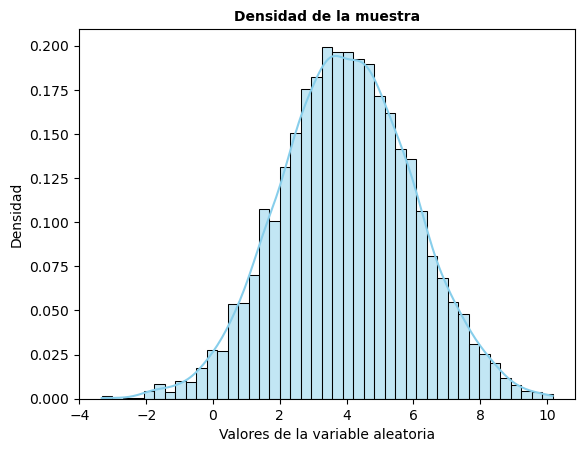

In [148]:
# Contraste de Hipótesis
# ==============================================================================
print(shapiro(muestra_B))

# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    muestra_B,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de la muestra A', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)
plt.show()



# Gráfico Histograma 
# ==============================================================================
sns.histplot(muestra_B, kde=True, stat="density", color="skyblue")


plt.xlabel('Valores de la variable aleatoria')
plt.ylabel('Densidad')
plt.title('Densidad de la muestra', fontsize = 10, fontweight = "bold")

plt.show()

## Análisis Diferencias entre medias - Contraste ANOVA y Boxplots

In [135]:
#Datos
url = "http://www.statsci.org/data/general/flicker.txt" # URL del archivo
flicker = pd.read_csv(url, sep="\t")# Leer el archivo desde la URL
flicker.head()

,Colour,Flicker
0,Brown,26.8
1,Brown,27.9
2,Brown,23.7
3,Brown,25.0
4,Brown,26.3


In [136]:
flicker['Colour'].unique()

array(['Brown', 'Green', 'Blue'], dtype=object)

In [137]:
muestra_A=flicker[flicker['Colour']=='Brown']['Flicker']
muestra_B=flicker[flicker['Colour']=='Green']['Flicker']
muestra_C=flicker[flicker['Colour']=='Blue']['Flicker']

In [140]:
muestra_A.mean()

25.587500000000002

In [141]:
muestra_B.mean()

26.919999999999998

In [142]:
muestra_C.mean()

28.166666666666668

F_onewayResult(statistic=4.802346136941867, pvalue=0.023248951722088834)


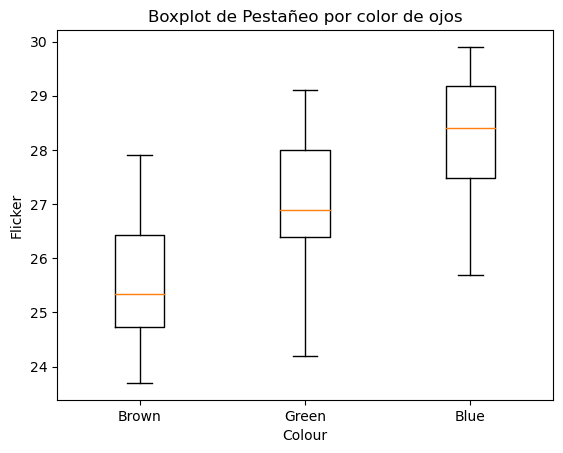

In [138]:
#Contraste: H0: Dos o más grupos tienen la misma media / H1: Todos los grupos tienen distinta media
# ==============================================================================
print(f_oneway(muestra_A, muestra_B, muestra_C))

#Boxplot
# ==============================================================================

plt.boxplot([muestra_A,muestra_B,muestra_C], positions=[1,2,3], labels=['Brown', 'Green', 'Blue'])


plt.xlabel('Colour')
plt.ylabel('Flicker')
plt.title('Boxplot de Pestañeo por color de ojos')

plt.show()

## Test t de student - Media = 0

In [59]:
#Datos
lizard_data = [6.2, 6.6, 7.1, 7.4, 7.6, 7.9, 8, 8.3, 8.4, 8.5, 8.6, 8.8, 8.8, 9.1, 
                9.2, 9.4, 9.4, 9.7, 9.9, 10.2, 10.4, 10.8,11.3, 11.9]

Empleando el test t de Student con el siguiente comando obtenemos un p-valor muy pequeño. En consecuencia la hipótesis nula de que la media es 0 queda rechazada. 

El contraste de hipótesis de si la media de los lagartos es 0, se formaliza como:

Hipótesis nula: mu=0

Hipótesis alternativa: mu!=0

In [3]:
ttest_1samp(lizard_data, popmean=0)


TtestResult(statistic=30.47688743400245, pvalue=4.242487053129581e-20, df=23)

In [4]:
estadistico=ttest_1samp(lizard_data, popmean=0)[0]
estadistico

30.47688743400245

In [5]:
p_valor=ttest_1samp(lizard_data, popmean=0)[1]
p_valor

4.242487053129581e-20

p-valor pequeño -> Rechazamos H0 -> Aceptamos H1

## Test t de student - Media = valor

Hipótesis nula: mu=8.4

Hipótesis alternativa: mu!=8.4

In [6]:
ttest_1samp(lizard_data, popmean=8.4) #unilateral H1: mu!=8.4


TtestResult(statistic=1.6987117586165308, pvalue=0.10286258347731378, df=23)

p-valor pequeño -> Rechazamos H0 -> Aceptamos H1

## Test t de student unilaterales- Media < valor

In [7]:
#Datos
lizard_data = [6.2, 6.6, 7.1, 7.4, 7.6, 7.9, 8, 8.3, 8.4, 8.5, 8.6, 8.8, 8.8, 9.1, 
                9.2, 9.4, 9.4, 9.7, 9.9, 10.2, 10.4, 10.8,11.3, 11.9]

Hipótesis nula: mu=8.4

Hipótesis alternativa: mu<8.4

In [8]:
ttest_1samp(lizard_data, popmean=8.4,  alternative='less') #unilateral H1: mu<8.4


TtestResult(statistic=1.6987117586165308, pvalue=0.9485687082613431, df=23)

p-valor pequeño -> Rechazamos H0 -> Aceptamos H1

## Test t de student unilaterales- Media > valor

Hipótesis nula: mu=8.4

Hipótesis alternativa: mu>8.4

In [9]:
ttest_1samp(lizard_data, popmean=8.4,  alternative='greater') #unilateral H1: mu>8.4


TtestResult(statistic=1.6987117586165308, pvalue=0.05143129173865689, df=23)

p-valor pequeño -> Rechazamos H0 -> Aceptamos H1

## Contraste Diferencia de medias de dos muestras normales

#### Distinta varianza

En este caso vamos a realizar un contraste sobre las medias de dos muestras normales.

H0: mu_x = mu_y

H1: mu_x!=mu_y 

En el primer caso vamos a suponer que las muestras, si bien son normales e independientes, cuentan con una varianza distinta. 

In [10]:
#Datos
x = norm.rvs(loc=3, scale=2, size=200)
y = norm.rvs(loc=4, scale=1, size=200)

In [11]:
# T Test
ttest_ind(x, y, alternative = 'less', equal_var=False )

TtestResult(statistic=-5.72123662234618, pvalue=1.3042592546516621e-08, df=293.2573673512629)

Como el p valor es muy pequeño, aceptamos la hipótesis alternativa H1: mu_x-mu_y < 0

p-valor pequeño -> Rechazamos H0 -> Aceptamos H1

#### Misma varianza

En el segundo caso vamos a suponer muestras normales, independientes y con la misma varianza. Es por ello que podremos utilizar el test de t-Student para dos muestars.

H0: mu_x = mu_y

H1: mu_x!=mu_y 

In [12]:
#Datos
x = norm.rvs(loc=3, scale=2, size=200)
y = norm.rvs(loc=2, scale=2, size=200)

In [13]:
ttest_ind(x, y, alternative = 'less', equal_var=True )

TtestResult(statistic=5.016956708995771, pvalue=0.999999603653558, df=398.0)

Como el p valor vale 1 y es mayor que alpha, aceptamos la hipótesis nula H0: mu_x - mu_y >= 0

p-valor pequeño -> Rechazamos H0 -> Aceptamos H1

## Contraste Diferencia de varianzas de dos muestras normales

H0: varianzas iguales

H1: varianzas diferentes

In [14]:
#Datos
x = norm.rvs(loc=3, scale=1, size=100)
y = norm.rvs(loc=8, scale=1.6, size=100)
z = norm.rvs(loc=8, scale=1, size=100)

In [15]:
levene(y, x)

LeveneResult(statistic=4.056378430490076, pvalue=0.04535805871069756)

In [16]:
levene(z, x)

LeveneResult(statistic=2.6789941752063164, pvalue=0.10326835767078729)

p-valor pequeño -> Rechazamos H0 -> Aceptamos H1

## Contraste Normalidad

Para hacer los contrastes de manera rigurosa debemos asegurarnos que la distribución se aproxima por una Normal. Para ello tenemos los siguientes contrastes.

En este primer caso generamos datos de una exponencial y observamos mediante el contraste shapiro que el pvalor dictamina que no es normal, a su vez vemos en un qqplot que los puntos no están sobre la línea, esto significa que los cuantiles no están distribuídos como en una normal.

H0: La muestra es normal

H1: La muestra no es normal

In [17]:
#Datos
muestra = expon.rvs(scale=10, size=500)

In [18]:
# Shapiro-Wilk test
shapiro_test = shapiro(muestra) #H0 es que la muestra es normal
shapiro_test

ShapiroResult(statistic=0.838525652885437, pvalue=3.8812198874943865e-22)

En este segundo caso, considerando una muestra que sigue una distribución normal, observamos un pvalor que indica que es normal y una adecuación a la línea buena:

H0: La muestra es normal

H1: La muestra no es normal

In [19]:
#Datos
muestra = norm.rvs(4,2, size=4999)

In [20]:
# Shapiro-Wilk test
shapiro_test = shapiro(muestra) #H0 es que la muestra es normal
shapiro_test

ShapiroResult(statistic=0.9996004104614258, pvalue=0.41754618287086487)

p-valor pequeño -> Rechazamos H0 -> Aceptamos H1

## Contraste Igualdad de distribuciones

El test de Kolmogorov-Smirnov es un test no paramétrico que sirve para contrastar si dos muestras proceden de una misma distribución. Se resalta que si bien se podría usar para detectar la normalidad de una muestra, se aconseja el uso de test como el Shapiro para dicho fin. Como se comenta en los apuntes, los qqplots también permiten saber si dos muestras distintas proceden de una misma distribución, vemos que no se ajustan:

H0: misma distribución

H1: distinta distribución

In [21]:
#Datos
muestra_A = norm.rvs(4,2, size=4999)
muestra_B = uniform.rvs(0,200, size=500)

In [22]:
ks_2samp(muestra_A, muestra_B)

KstestResult(statistic=0.9501996399279856, pvalue=1.73e-322, statistic_location=9.719816694197146, statistic_sign=1)

p-valor pequeño -> Rechazamos H0 -> Aceptamos H1

## Contraste Distribución de referencia

H0: distribución igual a la contrastada

H1: distribución distinta a la contrastada

In [23]:
muestra_A = norm.rvs(4,2, size=4999)
muestra_B = uniform.rvs(0,200, size=500)

In [24]:
kstest(muestra_A, cdf=expon.cdf, args=[10])

KstestResult(statistic=0.9981996399279855, pvalue=0.0, statistic_location=9.995363727485529, statistic_sign=1)

In [25]:
kstest(muestra_A, cdf=norm.cdf, args=[4,2])

KstestResult(statistic=0.010676597470660854, pvalue=0.615031446384029, statistic_location=5.158668829493869, statistic_sign=-1)

In [26]:
kstest(muestra_A, cdf=norm.cdf, args=[8,5])

KstestResult(statistic=0.5127775377673596, pvalue=0.0, statistic_location=6.9906479747568255, statistic_sign=1)

In [27]:
kstest(muestra_B, cdf=norm.cdf, args=[4,2])

KstestResult(statistic=0.9436759290035687, pvalue=0.0, statistic_location=9.251317902385248, statistic_sign=-1)

In [28]:
kstest(muestra_B, cdf=uniform.cdf, args=[0,200])

KstestResult(statistic=0.04077069282966961, pvalue=0.3669834059485363, statistic_location=155.7541385659339, statistic_sign=-1)